In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

ModuleNotFoundError: No module named 'pandas'

# Load Datasets


## alternate option for open csv file

In [ ]:
# import gdown
# data_url = "https://drive.google.com/uc?id=1c0vBcSvWwWNRskum-3mYhc9FmbactX5O"
# state_data_url = "https://drive.google.com/uc?id=1UhZ3yu1Qe4A4KszBY2RXBSusCv3gFOJW"
# NCAP_funding_url = "https://drive.google.com/uc?id=1kBW4iTit7NQPIK_62X5wOCgDuA8bN45_"
# gdown.download(data_url, "Data.csv", quiet=False)
# gdown.download(state_data_url, "State_data.csv", quiet=False)
# gdown.download(NCAP_funding_url, "NCAP_Funding.csv", quiet=False)

ModuleNotFoundError: No module named 'gdown'

In [ ]:
data = pd.read_csv("./Data.csv")
data

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [130]:
data = data.astype({'state': str})
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.astype({'station': str})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627461 entries, 0 to 1627460
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Timestamp  1627461 non-null  datetime64[ns]
 1   station    1627461 non-null  object        
 2   PM2.5      728348 non-null   float64       
 3   PM10       699014 non-null   float64       
 4   address    1387431 non-null  object        
 5   city       1563702 non-null  object        
 6   latitude   1563702 non-null  float64       
 7   longitude  1563702 non-null  float64       
 8   state      1627461 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 111.7+ MB


<ipython-input-131-6dff6611cb32>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM2.5'].fillna(station_means, inplace=True)
<ipython-input-131-6dff6611cb32>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

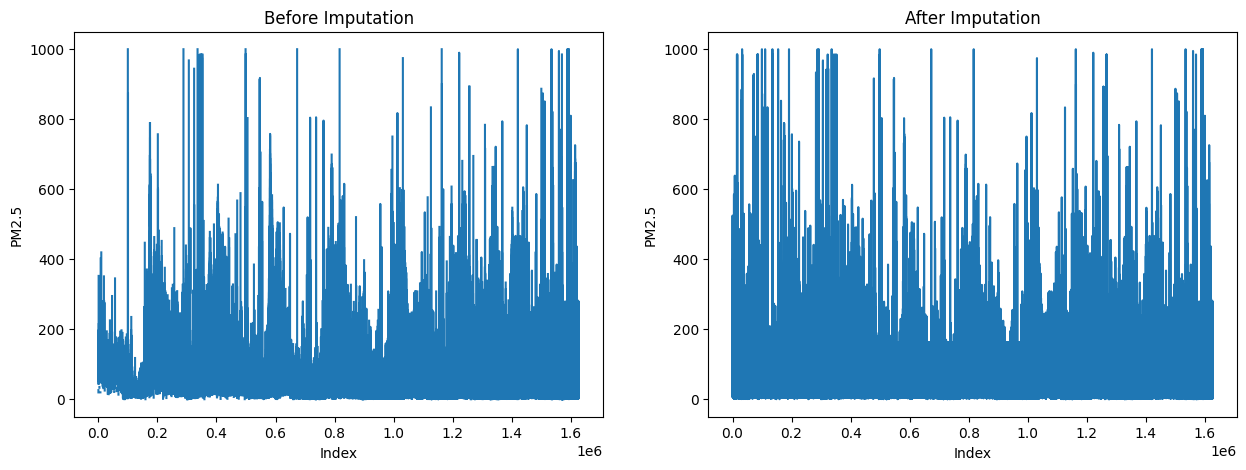

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def hierarchical_impute(data):
    station_means = data.groupby(['state', 'city', 'station'])['PM2.5'].transform('median')
    city_means = data.groupby(['state', 'city'])['PM2.5'].transform('median')
    state_means = data.groupby(['state'])['PM2.5'].transform('median')
    global_mean = data['PM2.5'].median()

    data['PM2.5'].fillna(station_means, inplace=True)
    data['PM2.5'].fillna(city_means, inplace=True)
    data['PM2.5'].fillna(state_means, inplace=True)
    data['PM2.5'].fillna(global_mean, inplace=True)

df = data['PM2.5'].reset_index()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df.index, df['PM2.5'])
ax[0].set_title('Before Imputation')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('PM2.5')

hierarchical_impute(data)

df = data['PM2.5'].reset_index()
ax[1].plot(df.index, df['PM2.5'])
ax[1].set_title('After Imputation')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('PM2.5')

plt.show()

In [132]:
data

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",26.225479,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",25.507368,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",42.528472,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",15.967470,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",42.005990,NaN,NaN,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.710000,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.230000,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.000000,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",8.107366,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [133]:
data = data.astype({'state': str})
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.astype({'station': str})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627461 entries, 0 to 1627460
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Timestamp  1627461 non-null  datetime64[ns]
 1   station    1627461 non-null  object        
 2   PM2.5      1627461 non-null  float64       
 3   PM10       699014 non-null   float64       
 4   address    1387431 non-null  object        
 5   city       1563702 non-null  object        
 6   latitude   1563702 non-null  float64       
 7   longitude  1563702 non-null  float64       
 8   state      1627461 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 111.7+ MB


In [ ]:
NCAP_Funding = pd.read_csv("./NCAP_Funding.csv")
NCAP_Funding.drop(columns=['0'], inplace=True)
NCAP_Funding.drop(index=0, inplace=True)
NCAP_Funding.head(5)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12
1,1,Andhra Pradesh,Vijaywada,6,6,-,-,-,-,6,6,22.91,22.91
2,2,Andhra Pradesh,Guntur,0.12,0.12,0.76,0.76,1.96,1.96,2.84,2.84,22.91,22.91
3,3,Andhra Pradesh,Kurnool,0.06,0.06,0.76,0.76,1.36,1.36,2.18,2.18,22.91,22.91
4,4,Andhra Pradesh,Nellore,0.06,0.06,0.76,0.76,1.92,1.92,2.74,2.74,22.91,22.91
5,5,Andhra Pradesh,Visakhapatnam,0.12,0.12,-,-,-,-,0.12,0.12,22.91,22.91


In [135]:
NCAP_Funding.replace('-', 0.0, inplace=True)
NCAP_Funding = NCAP_Funding.astype({'4': float})
NCAP_Funding = NCAP_Funding.astype({'6': float})
NCAP_Funding = NCAP_Funding.astype({'8': float})
NCAP_Funding = NCAP_Funding.astype({'10': float})
NCAP_Funding = NCAP_Funding.astype({'12': float})
NCAP_Funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 1 to 117
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  117 non-null    int64  
 1   1           117 non-null    object 
 2   2           117 non-null    object 
 3   3           117 non-null    object 
 4   4           117 non-null    float64
 5   5           117 non-null    object 
 6   6           117 non-null    float64
 7   7           117 non-null    object 
 8   8           117 non-null    float64
 9   9           117 non-null    object 
 10  10          117 non-null    float64
 11  11          117 non-null    object 
 12  12          117 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 12.0+ KB


In [ ]:
State_data = pd.read_csv("./State_data.csv")
State_data

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627461 entries, 0 to 1627460
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Timestamp  1627461 non-null  datetime64[ns]
 1   station    1627461 non-null  object        
 2   PM2.5      1627461 non-null  float64       
 3   PM10       699014 non-null   float64       
 4   address    1387431 non-null  object        
 5   city       1563702 non-null  object        
 6   latitude   1563702 non-null  float64       
 7   longitude  1563702 non-null  float64       
 8   state      1627461 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 111.7+ MB


#Spatial aggregation.

###1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [139]:
df = data.groupby('state', observed=True).mean(numeric_only=True)
print(df['PM2.5'].idxmax(), "has the highest average PM2.5 concentration")

Delhi has the highest average PM2.5 concentration


### 2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?


In [140]:
masked_data = data[(data['PM2.5'] > 300) & (data['Timestamp'].dt.year == 2023)]
df = masked_data.groupby('state', observed=True)['state'].value_counts()
print(df.idxmax(), "had the most day", "with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023")

Delhi had the most day with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023


### 3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [141]:

df = data.groupby('state', observed=True)['PM2.5'].std()
print(df.idxmax(), "has the highest variability in PM2.5 levels across its monitoring stations in 2023")

Delhi has the highest variability in PM2.5 levels across its monitoring stations in 2023


### 4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?


In [142]:
masked_data = data[(data['Timestamp'].dt.year == 2020) | (data['Timestamp'].dt.year == 2021)]
df = masked_data.groupby('state', observed=True)['PM2.5'].mean()
print(df.idxmin(), "has the lowest average PM2.5 levels", df[df.idxmin()] ,"during the Covid period (The year 2020-2021 both years inclusive)")

Sikkim has the lowest average PM2.5 levels 8.10736559139785 during the Covid period (The year 2020-2021 both years inclusive)


# Temporal Aggregation

### 1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [143]:
masked_data = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]
df = masked_data.groupby('station', observed='True')['PM2.5'].max()
print(df.idxmax(), "recorded the highest value",df.max(),"of PM 2.5 for the month Aug of 2020")

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB recorded the highest value 805.51 of PM 2.5 for the month Aug of 2020


### 2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [144]:
df = data.copy()
df['season'] = df['Timestamp'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer' if x in [3, 4, 5] else 'Monsoon')
df = df[df['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
df1=df.groupby('season')['PM2.5'].mean()
print("Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB has highest PM2.5 concentration in", df1.idxmax(), "with average pollution concentration of",df1.max())

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB has highest PM2.5 concentration in Winter with average pollution concentration of 46.80836197511404


potential factors of winter haaving high PM2.5 concentration:


1. stubble burning
2. temperature inversion (traps the pollutants close to surface)
3. more pollute particles in water drop in air

#3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
Calculate the monthly average PM2.5 for weekdays and weekends separately
X-axis: Months (January to December).
Y-axis: Average PM2.5 levels.
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

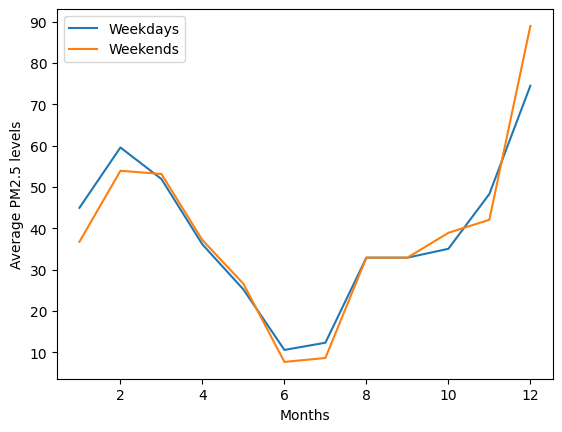

In [145]:
df=data.copy()
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df = df[df['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
df = df[df['Timestamp'].dt.year == 2021]
df1 = df[df['day_of_week'] < 5]
df2 = df[df['day_of_week'] >= 5]
df1 = df1.groupby(df1['Timestamp'].dt.month)['PM2.5'].mean()
df2 = df2.groupby(df2['Timestamp'].dt.month)['PM2.5'].mean()
plt.plot(df1.index, df1, label='Weekdays')
plt.plot(df2.index, df2, label='Weekends')
plt.xlabel('Months')
plt.ylabel('Average PM2.5 levels')
plt.legend()
plt.show()

#Spatio-temporal aggregation

###1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [146]:
df = data.copy()
df['season'] = df['Timestamp'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer' if x in [3, 4, 5] else 'Monsoon')
df = df[df['Timestamp'].dt.year == 2022]
df1 = df[df['season'] == 'Summer']
df2 = df[df['season'] == 'Monsoon']
df1 = df1.groupby('state', observed='True')['PM2.5'].mean()
df2 = df2.groupby('state', observed='True')['PM2.5'].mean()
df = (df2 - df1) / df1 * 100
print(df, "\n\n\n")
print(df.idxmax(), "has the most difference (increase or decrease)", str(df[df.idxmax()])+"%","for the year 2022")

state
Andhra Pradesh       -1.304610
Arunachal Pradesh   -43.954460
Assam               -11.715839
Bihar               -23.021707
Chandigarh          -26.076238
Chhattisgarh          1.531140
Delhi               -19.347282
Gujarat             -21.607215
Haryana             -24.030359
Himachal Pradesh    -20.405333
Jammu and Kashmir    57.460683
Jharkhand             0.000000
Karnataka           -21.463835
Kerala               -7.831597
Madhya Pradesh      -16.698940
Maharashtra         -13.865620
Manipur             -31.410019
Meghalaya           -33.033147
Mizoram             -63.485243
Nagaland            -46.065106
Odisha                1.260944
Puducherry            8.578662
Punjab              -14.327057
Rajasthan           -13.463531
Sikkim              -17.760606
Tamil Nadu            5.771191
Telangana           -21.608649
Tripura             -27.171163
Uttar Pradesh       -22.499332
Uttarakhand          -7.981120
West Bengal         -20.832134
nan                   0.000000
Na

### 2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


<Axes: xlabel='season'>

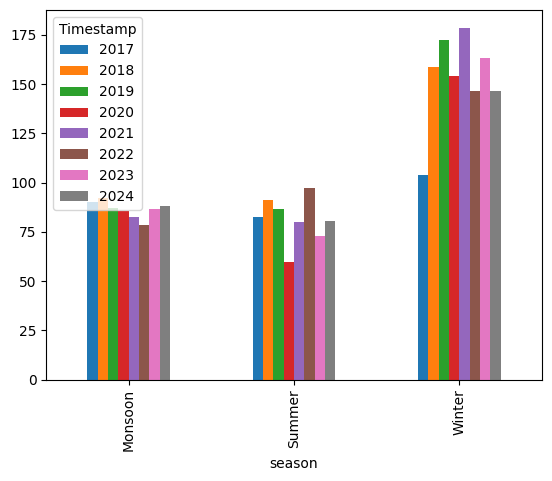

In [147]:
df = data.copy()
df['season'] = df['Timestamp'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer' if x in [3, 4, 5] else 'Monsoon')
df = df[df['state'] == "Delhi"]
df = df.groupby(['season', df['Timestamp'].dt.year])['PM2.5'].mean()
df.unstack().plot(kind='bar')

### 3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


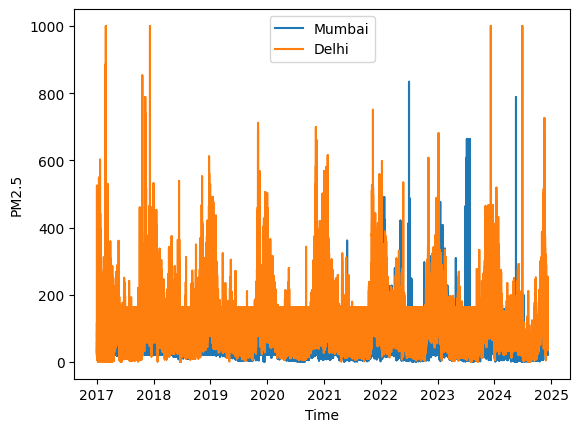

 fluctuation in Mumbai:  25.926822459467047 
 fluctuation in Delhi:  77.87664959176564


In [148]:
df = data[data['Timestamp'].apply(lambda x: x.year) >= 2015]
dfm = df[df['city'] == 'Mumbai']
dfd = df[df['city'] == 'Delhi']
plt.plot(dfm['Timestamp'], dfm['PM2.5'], label='Mumbai')
plt.plot(dfd['Timestamp'], dfd['PM2.5'], label='Delhi')
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.legend()
plt.show()
print(" fluctuation in Mumbai: ",dfm['PM2.5'].std(),"\n", "fluctuation in Delhi: ",dfd['PM2.5'].std())

# Population-Based

### 1. Which state in India has the highest number of monitoring stations relative to its population?


In [149]:
df = data.groupby('state')['state'].value_counts().reset_index()
df = pd.merge(df, State_data, left_on='state', right_on='State', how="inner")
df['ratio'] = df['count'] / df['Population']
print(df['state'][df['ratio'].idxmax()],"has the highest number of monitoring stations(",df['ratio'].max(),")relative to its population")

Chandigarh has the highest number of monitoring stations( 0.008245771945615614 )relative to its population


### 2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


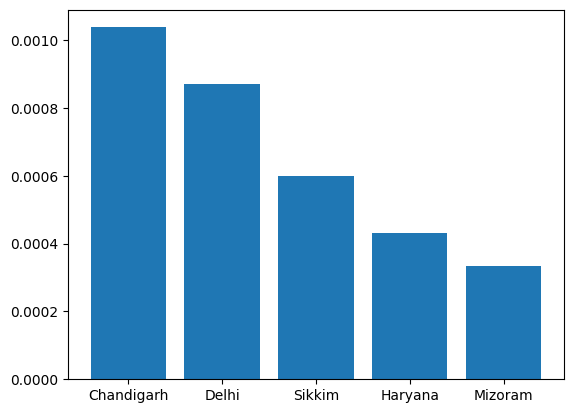

In [151]:
df = data[data['Timestamp'].dt.year == 2023].groupby('state')['state'].value_counts().reset_index()
df = pd.merge(df, State_data, left_on='state', right_on='State', how="inner")
df['ratio'] = df['count'] / df['Population']
df = df.sort_values(by='ratio', ascending=False)
df = df.head(5)
plt.bar(df['state'], df['ratio'])
plt.show()

### 3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.


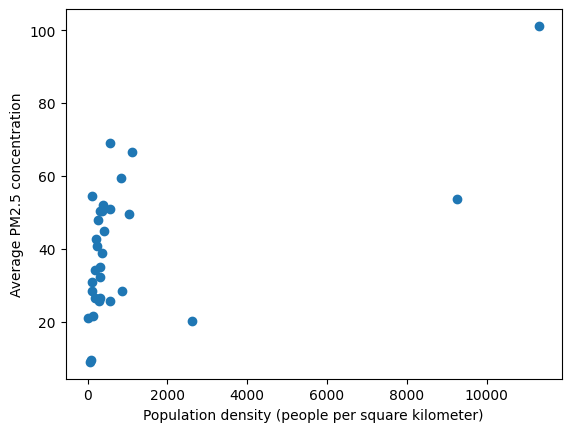

In [152]:
df = data.groupby('state')['PM2.5'].mean()
population_density = State_data['Population']/State_data['Area (km2)']
population_density.dropna(inplace=True)
df.dropna(inplace=True)
df = df.reindex(State_data['State'])
plt.scatter(population_density, df)
plt.xlabel('Population density (people per square kilometer)')
plt.ylabel('Average PM2.5 concentration')
plt.show()

# Area Based

### 1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


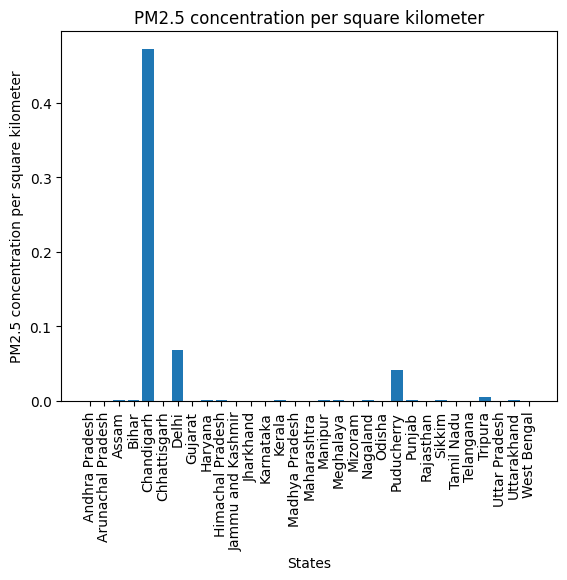

In [153]:
df = data.groupby('state')['PM2.5'].mean()
df = pd.merge(df, State_data, left_on='state', right_on='State', how="inner")
df['ratio'] = df['PM2.5'] / df['Area (km2)']
plt.bar(df['State'], df['ratio'])
plt.title('PM2.5 concentration per square kilometer')
plt.xlabel('States')
plt.ylabel('PM2.5 concentration per square kilometer')
plt.xticks(rotation=90)
plt.show()

### 2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


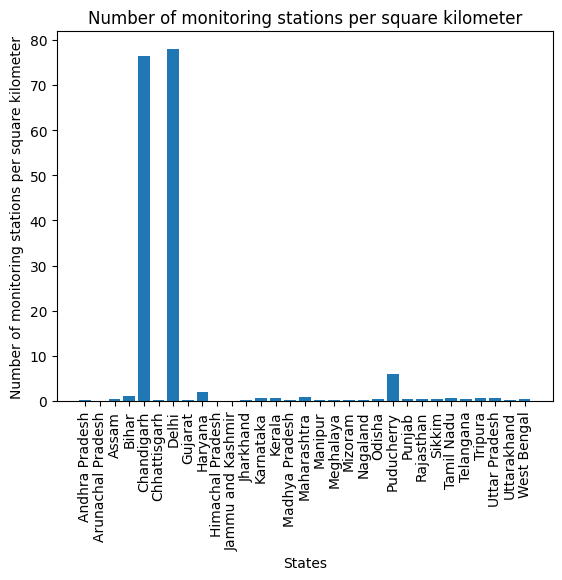

In [154]:
df = data.groupby('state')['state'].value_counts()
df = pd.merge(df, State_data, left_on='state', right_on='State', how="inner")
df['ratio'] = df['count'] / df['Area (km2)']
plt.bar(df['State'], df['ratio'])
plt.title('Number of monitoring stations per square kilometer')
plt.xlabel('States')
plt.ylabel('Number of monitoring stations per square kilometer')
plt.xticks(rotation=90)
plt.show()

### 3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


In [155]:
df = data[(data['state'] == 'Maharashtra') | (data['state'] == 'Madhya Pradesh')]
df = df[df['Timestamp'].dt.year == 2021]
print(df.groupby('state')['PM2.5'].mean())
print("Maharashtra population density", State_data[State_data['State'] == 'Maharashtra']['Population']/State_data[State_data['State'] == 'Maharashtra']['Area (km2)'])
print("Madhya Pradesh population sensity", State_data[State_data['State'] == 'Madhya Pradesh']['Population']/State_data[State_data['State'] == 'Madhya Pradesh']['Area (km2)'])

print("n\n\n\n")

print("higher the population density higher the polution")

state
Madhya Pradesh    41.809978
Maharashtra       39.713292
Name: PM2.5, dtype: float64
Maharashtra population density 1    365.192023
dtype: float64
Madhya Pradesh population sensity 4    235.608557
dtype: float64
n



higher the population density higher the polution


# Funding Based

### 1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

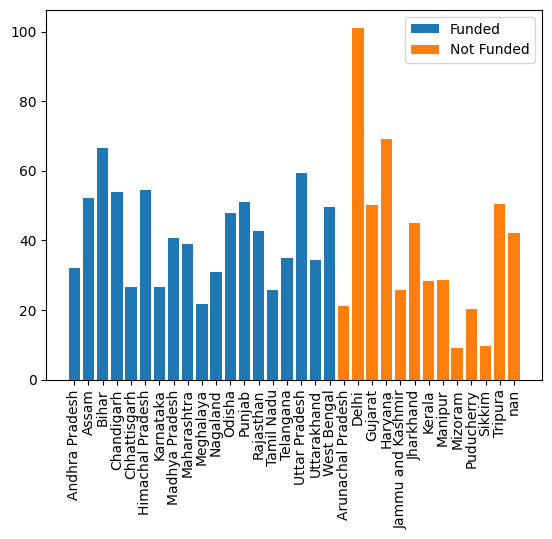

In [156]:
df = data.groupby('state')['PM2.5'].mean()
dfa = NCAP_Funding.copy()
dfa = dfa.replace('-', 0.0)
dfa = dfa.astype({'6': float})
dfa = dfa.groupby('1')['6'].sum()
dfa = dfa[dfa != 0]
funded = df[df.index.isin(dfa.index)]
not_funded = df[~df.index.isin(dfa.index)]
plt.bar(funded.index, funded, label='Funded')
plt.bar(not_funded.index, not_funded, label='Not Funded')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### 2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


<ipython-input-157-498d891f98d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_pm25_data["Timestamp"] = pd.to_datetime(assam_pm25_data["Timestamp"])
<ipython-input-157-498d891f98d9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_funding_data[col] = pd.to_numeric(assam_funding_data[col], errors="coerce")


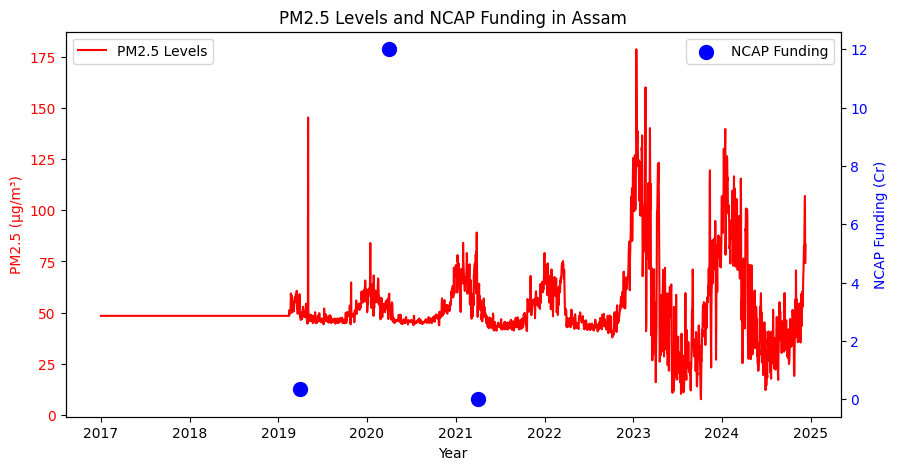

In [157]:

pm25_data = data.copy()
funding_data = NCAP_Funding.copy()

assam_pm25_data = pm25_data[pm25_data["state"] == "Assam"]
assam_pm25_data["Timestamp"] = pd.to_datetime(assam_pm25_data["Timestamp"])
assam_pm25_trend = assam_pm25_data.groupby("Timestamp")["PM2.5"].mean().reset_index()
assam_funding_data = funding_data[funding_data["1"] == "Assam"]

funding_columns = ["4", "6", "8", "10"]

for col in funding_columns:
    assam_funding_data[col] = pd.to_numeric(assam_funding_data[col], errors="coerce")

assam_funding_summary = assam_funding_data[funding_columns].sum().reset_index()
assam_funding_summary.columns = ["Year", "Funding Amount"]

year_mapping = {
    "4": "2019-04-01",
    "6": "2020-04-01",
    "8": "2021-04-01",
}

assam_funding_summary["Year"] = assam_funding_summary["Year"].map(year_mapping)
assam_funding_summary.dropna(inplace=True)
assam_funding_summary["Year"] = pd.to_datetime(assam_funding_summary["Year"])

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(assam_pm25_trend["Timestamp"], assam_pm25_trend["PM2.5"], color="red", label="PM2.5 Levels")
ax1.set_xlabel("Year")
ax1.set_ylabel("PM2.5 (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.scatter(assam_funding_summary["Year"], assam_funding_summary["Funding Amount"], color="blue", label="NCAP Funding", marker="o", s=100)
ax2.set_ylabel("NCAP Funding (Cr)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("PM2.5 Levels and NCAP Funding in Assam")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

### 3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


                   1     10             State  Population  Area (km2)
0     Andhra Pradesh  35.12    Andhra Pradesh    49577103      162975
1              Assam  12.36             Assam    31205576       78438
2              Bihar  21.60             Bihar   104099452       94163
3         Chandigarh  17.89        Chandigarh     1055450         114
4       Chhattisgarh  13.06      Chhattisgarh    25545198      135192
5              Delhi  11.25             Delhi    16787941        1484
6            Gujarat  12.00           Gujarat    60439692      196024
7   Himachal Pradesh  10.72  Himachal Pradesh     6864602       55673
8          Jharkhand   6.00         Jharkhand    32988134       79716
9          Karnataka  15.14         Karnataka    61095297      191791
10    Madhya Pradesh  27.14    Madhya Pradesh    72626809      308252
11       Maharashtra  63.15       Maharashtra   112374333      307713
12         Meghalaya   3.00         Meghalaya     2966889       22429
13          Nagaland

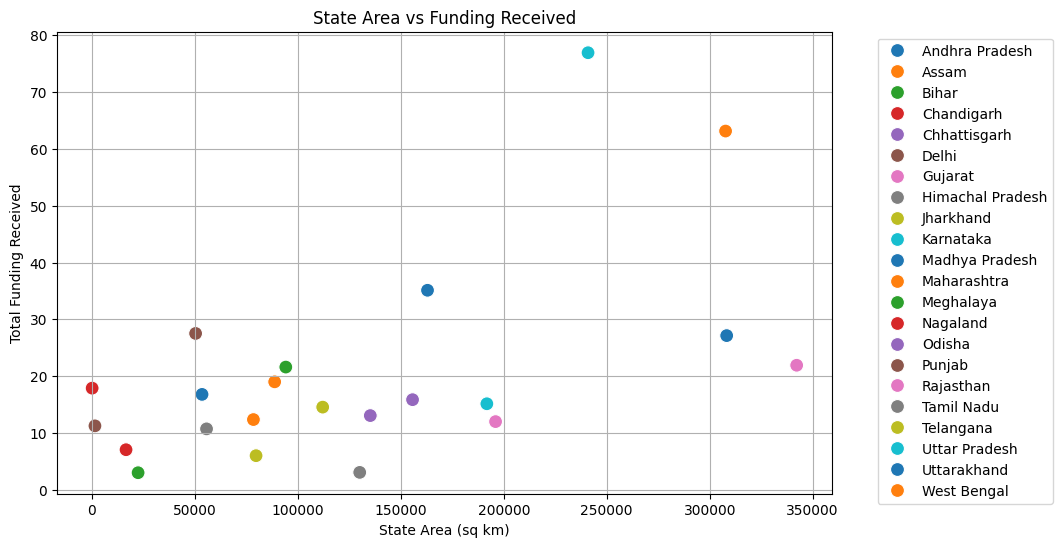

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

funding_df = NCAP_Funding
state_df = State_data
# print(funding_df)

funding_by_state = funding_df.groupby('1')['10'].sum().reset_index()
merged_df = pd.merge(funding_by_state, state_df, left_on="1", right_on='State', how="inner")
print(merged_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x="Area (km2)",
    y="10",
    hue="State",
    palette="tab10",
    s=100
)

plt.xlabel("State Area (sq km)")
plt.ylabel("Total Funding Received")
plt.title("State Area vs Funding Received")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

# Miscellaneous Questions

### 1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [159]:
df = data[data['Timestamp'].dt.year == 2023]
df = df.groupby('city')['PM2.5'].mean()
df = df.sort_values(ascending=False)
df = df.head(1)
total_day = len(data[data['city'] == df.index[0]])
day = len(data[(data['city'] == df.index[0]) & (data['PM2.5'] > 300)])
print(str(day/total_day*100)+"% of days with PM2.5 levels above the hazardous threshold (300 µg/m) for most polluted city", df.index[0])

0.5860048259220959% of days with PM2.5 levels above the hazardous threshold (300 µg/m) for most polluted city Byrnihat


### 2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

[]

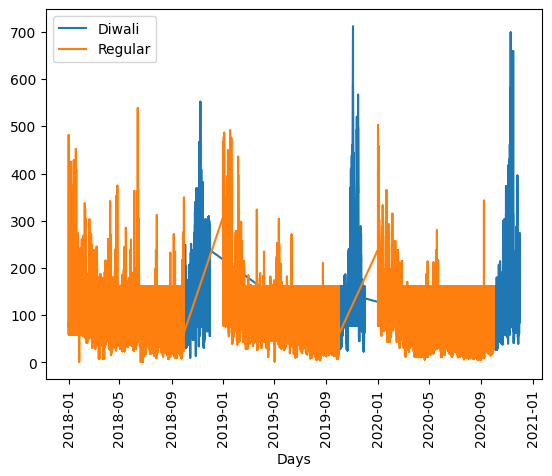

In [160]:
df = data[(data['city'] == 'Delhi') & (data['Timestamp'].dt.year.isin([2018, 2019, 2020]))]
df1 = df[df['Timestamp'].dt.month.isin([10, 11])]
df2 = df[df['Timestamp'].dt.month.isin([1, 2, 3, 4, 5, 6, 7, 8, 9])]
plt.plot(df1['Timestamp'], df1['PM2.5'], label='Diwali')
plt.plot(df2['Timestamp'], df2['PM2.5'], label='Regular')
plt.xlabel('Days')
plt.xticks(rotation = 90)
plt.legend()
plt.plot()

### 3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends

Andhra Pradesh received the highest NCAP funding in 2020


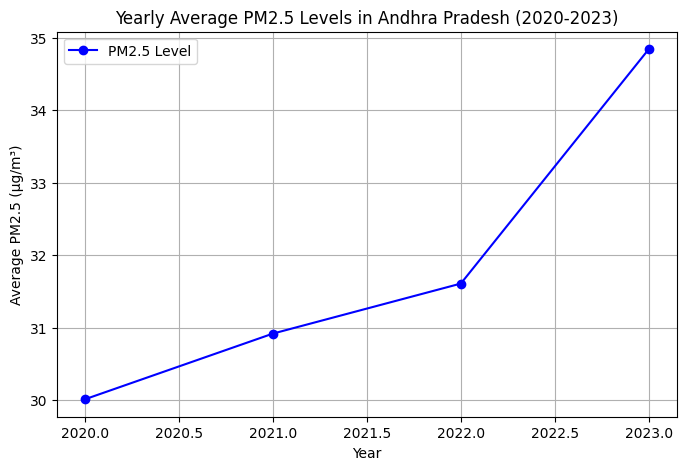

Timestamp
2020    30.010790
2021    30.917292
2022    31.607758
2023    34.843461
Name: PM2.5, dtype: float64


In [161]:
df = NCAP_Funding.copy()
df = df.replace('-', 0.0)
df.dropna(inplace=True)
df = df.astype({'6': float})
df = df.groupby('1')['6'].sum()
print(df.idxmax(), "received the highest NCAP funding in 2020")

daf = data[(data['state'] == df.idxmax()) & (data['Timestamp'].dt.year.isin([2020, 2021, 2022, 2023]))]
yearly_pm25 = daf.groupby(daf['Timestamp'].dt.year)['PM2.5'].mean()
highest_funded_state = df.idxmax()

plt.figure(figsize=(8, 5))
plt.plot(yearly_pm25.index, yearly_pm25.values, marker="o", linestyle="-", color="b", label="PM2.5 Level")

plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"Yearly Average PM2.5 Levels in {highest_funded_state} (2020-2023)")

plt.grid(True)
plt.legend()
plt.show()
print(yearly_pm25)

### 4. Draw the map of India and plot the sensor locations on the map.

In [162]:
!pip install cartopy

/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:498: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(re

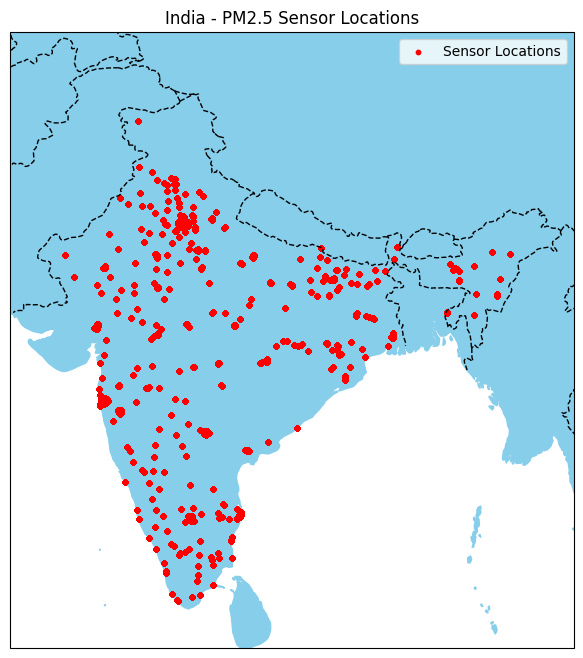

In [163]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

sensor_locations = data.dropna(subset=["latitude", "longitude"])
fig = plt.figure(figsize=(10, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=1)
ax.add_feature(cfeature.LAND, color="skyblue")
ax.set_extent([68, 98, 6, 38])

plt.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color="red", s=10, label="Sensor Locations", transform=ccrs.PlateCarree())
plt.title("India - PM2.5 Sensor Locations")

plt.legend()
plt.show()

### 1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers

### Inequitable Distribution of Monitoring Stations:

<ipython-input-164-4d37816dd6d5>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df.index, rotation=90)


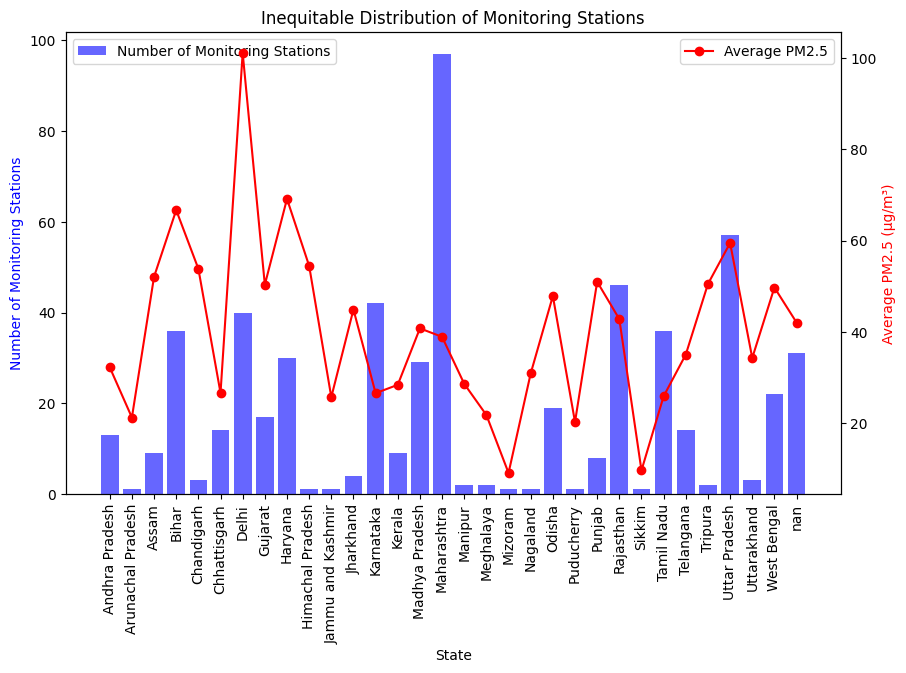

In [164]:
import matplotlib.pyplot as plt

df = data.groupby('state')['station'].nunique().to_frame(name='station_count')

df['PM2.5_mean'] = data.groupby('state')['PM2.5'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df.index, df['station_count'], label='Number of Monitoring Stations', color='b', alpha=0.6)

ax2 = ax1.twinx()
ax2.plot(df.index, df['PM2.5_mean'], label='Average PM2.5', color='r', marker='o')

ax1.set_xlabel('State')
ax1.set_ylabel('Number of Monitoring Stations', color='b')
ax2.set_ylabel('Average PM2.5 (µg/m³)', color='r')
ax1.set_title('Inequitable Distribution of Monitoring Stations')

ax1.set_xticklabels(df.index, rotation=90)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
